<a href="https://colab.research.google.com/github/user8391/Deep-Learning-/blob/main/gradient_discent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

1D Gradient Descent

In [5]:
# Gradient Descent for 1D
# (Manual)
import numpy as np
import matplotlib.pyplot as plt

#from IPython import display
#display.set_matplotlib_formats('svg') # pixel format -> vector format

In [6]:
def fx(x): # Main fn
  return (3*x**2 + 2*x + 12)

def dfx(x): # Derivative fn
  return (6*x + 2)



In [7]:
# Defining range of plot
x = np.linspace(-2 , 2 , 2001)

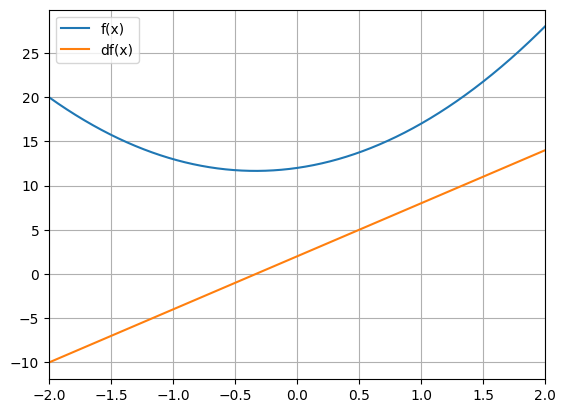

In [8]:
plt.plot(x,fx(x),x,dfx(x))
plt.grid()
plt.xlim(x[[0,-1]])
plt.legend(['f(x)','df(x)'])
plt.show()

Learning Algorithm - Gradient Descent implementation

In [9]:
# Random Initialization
localmin = np.random.choice(x,1)

# Learning parameters
learning_rate = 0.01  # THE usual distances between the value of localmin wrt x in 2 iterations
training_epochs = 500 # the number of iterations

# Running the training loop
for i in range(training_epochs):
  localmin = localmin - learning_rate*dfx(localmin)

localmin

array([-0.33333333])

In [10]:
# Instead of a pre defined number of iterations , what if we decide to have a "threshold" value of derivative that sets the loop off when reached

localmin = np.random.choice(x,1)

learning_rate = 0.01
training_epochs = 500

threshold = 0.0001 # the smaller this threshold derivative is, the better the output would be

for i in range(training_epochs):
  df = dfx(localmin)
  if abs(df) < threshold: # to handle negative values of the derivative
    break
  localmin = localmin - learning_rate*df

localmin


array([-0.33331714])

# CHALLENGE

0.0


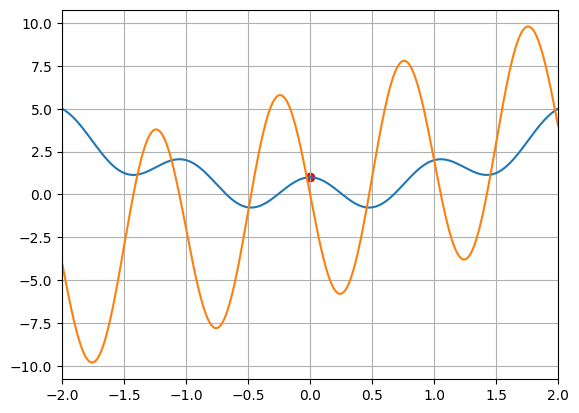

In [11]:
# CodeChallenge (Unfortunate Starting Value)
#================
'''repeat 1D GD for the following fn
   1) cos(2*pi*x)+x**2 x E {-2,2}
   2) Hard code a starting value of x = 0 '''

import numpy as np
import matplotlib.pyplot as plt

def fx(x): # Main fn
  return (np.cos(2*np.pi*x) + x**2)

def dfx(x): # Derivative fn
  return (-2*np.pi*np.sin(2*np.pi*x) + 2*x)

localmin = 0
learning_rate = 0.01
training_epochs = 120

for i in range(training_epochs):
  deriv = dfx(localmin)
  localmin = localmin - learning_rate*deriv

print(localmin)

plt.plot(x,fx(x) , x,dfx(x))
plt.grid()
plt.xlim(-2,2)
plt.scatter(localmin,fx(localmin), color='r')

plt.show()

# here the starting point has a derivative of 0 , even though it is a local maxima , localminima does not change due to the nature of this point
# Failure scenerio of grad descent
# An extreme case of venishing gradient

# in practice the probability of something like this happening in high dimensional situations is very miniscule

2D Gradient Descent

In [12]:
# Importing necessary Libs
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

#from IPython import display
#display.set_matplotlib_formats('svg')


In [13]:
# Defining the Function

def peaks(x,y):

  # Expanding to a 2D mesh
  x,y = np.meshgrid(x,y)

  # Please calculate derivatives manually ----IFF you prefer to suffer eternally
  # z = function

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
  - 10*(x/5-x**3-y**5) * np.exp(-x**2-y**2) \
  - 1/3*np.exp(-(x+1)**2-y**2)

  return z


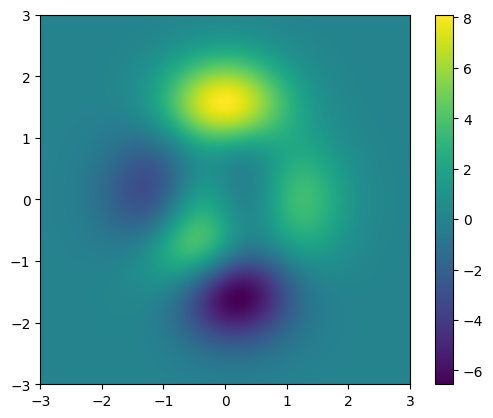

In [14]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# Visualizing fn
plt.imshow(Z, extent=[-3,3,-3,3],origin = 'lower')
plt.colorbar()
plt.show()

In [15]:
# Create Derivative functions using sympy
sx , sy = sym.symbols('sx,sy')

sZ=3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
  - 10*(sx/5-sx**3-sy**5) * sym.exp(-sx**2-sy**2) \
  - 1/3*sym.exp(-(sx+1)**2-sy**2)

# Compute derivatives from sympy and create functions from themm.lambdify converts it into a csllable function
# sym.dff returns a sympy object , not a function , sy
df_x = sym.lambdify((sx,sy),sym.diff(sZ , sx),'sympy')
df_y = sym.lambdify((sx,sy),sym.diff(sZ , sy),'sympy')

# Testing derivative wrt x at 1,1
df_x(1,1).evalf()

-1.07369833656079

In [16]:
# Finding Minima
localmin = np.random.rand(2)
startpoint = localmin[:] # Creating a copy , not reassigning

learning_rate = 0.01
training_epochs = 1000

# Training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  gradient = np.array([df_x(localmin[0],localmin[1]).evalf(), # localmin[0] is x and localmin[1] is y
                       df_y(localmin[0],localmin[1]).evalf()]) # we are plcing partial derivatives in an array to form gradient
  localmin = localmin - learning_rate*gradient
  trajectory[i, :] = localmin

print(startpoint)
localmin


[0.01866998 0.41824069]


array([0.296445553846832, 0.320196247666835], dtype=object)

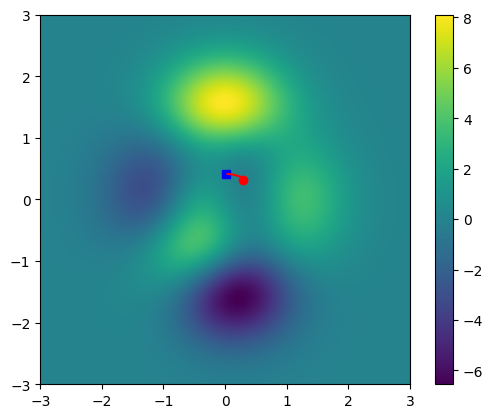

In [17]:
# Visualizing for verification
plt.imshow(Z, extent=[-3,3,-3,3],origin = 'lower') # visual
plt.plot(startpoint[0],startpoint[1],'bs') #startpoint square
plt.plot(localmin[0],localmin[1],'ro') #endpoint circle
plt.plot(trajectory[:,0],trajectory[:,1],'r') # trajectory

plt.colorbar()
plt.show()

In [18]:
# Parametric Experiments (Playing with meta parameters)
# Meta Parameters - Settings that affect the rate of learning / behavior of the ML model.
# One variable experiments - Initial value / Learning Rate
# Two variable experiments - Learning rate & Training epochs
# =======================================================================================

import numpy as np
import matplotlib.pyplot as plt

#from IPython import display
#display.set_matplotlib_formats('svg')

# **Running Experiments to Understand Gradient Discent**

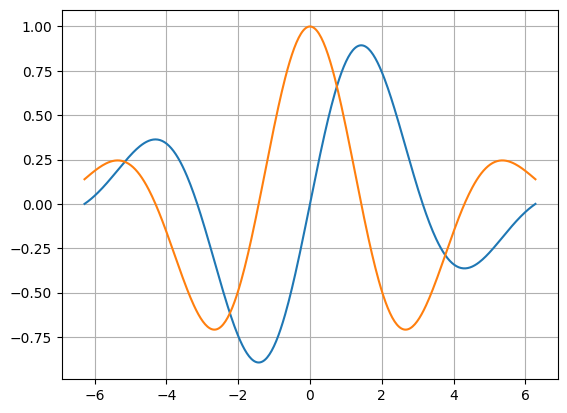

In [19]:
# Function Creation

x = np.linspace(-2*np.pi , 2*np.pi ,401)
fx = np.sin(x)*np.exp(-x**2*0.05)

#Derivative

df = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)
plt.plot(x,fx ,x , df)
plt.grid()
plt.show()

# Writing them as functions (overwriting the variables - not so good idea!!)
def fx(x):
  return np.sin(x)*np.exp(-x**2*0.05)

def df(x):
  return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)

In [20]:
# Random Starting Point
localmin = np.random.choice(x,1) # choosing one point from linspace x

# Meta Parameters
learning_rate = 0.01
training_epochs = 1000

# Learning
for i in range(training_epochs):
  deriv = df(localmin)
  localmin = localmin - learning_rate*deriv

localmin


array([-1.4287921])

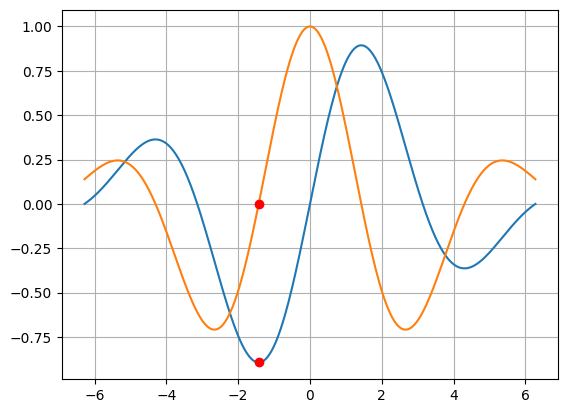

In [21]:
# PLOTTING
plt.plot(x,fx(x) ,x , df(x))
plt.plot(localmin,fx(localmin),'ro',localmin,df(localmin),'ro')
plt.grid()
plt.show()

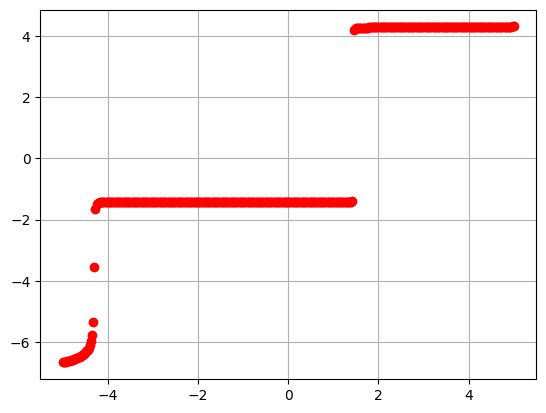

It settles into 3 values 4.3 or -1.5 or -6.8


In [22]:
# Experiment - Often we do not have the luxury to know data about the graph just by visualizing , we run experimrnts to help us understand data

start_locs = np.linspace(-5,5,401)  # initial start points
final_guess = np.zeros(len(start_locs)) # outputs when learning with each of those starting point

learning_rate = 0.01
training_epochs = 1000
p=0
for x in start_locs:
  localmin = x #initial value

  # training
  for i in range(training_epochs):
    deriv = df(localmin)
    localmin = localmin - learning_rate*deriv

  final_guess[p] = localmin
  p+=1


plt.plot(start_locs,final_guess , 'ro')
plt.grid()
plt.show()

print("It settles into 3 values 4.3 or -1.5 or -6.8")
# Does not specifically mean that the place with higest number of points is "global minima" , it just tells about the locations of Local Minimas


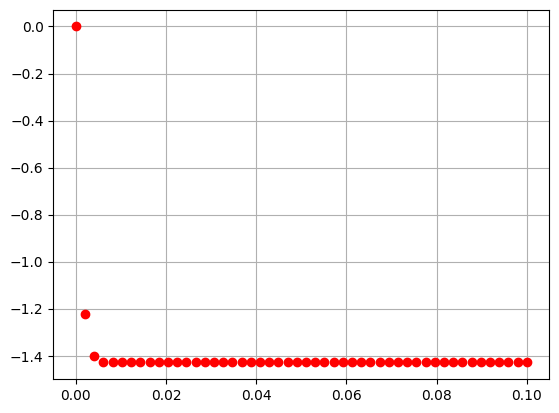

In [23]:
# Experiment 2

start_locs = 0  # initial start point forced to 0 (to check learning rate)


learning_rate = np.linspace(1e-10 ,1e-1,50)
final_guess = np.zeros(len(learning_rate))
training_epochs = 1000
p=0
for l in learning_rate:
  localmin = start_locs #initial value (after every iteration of one learning rate)

  # training
  for i in range(training_epochs):
    deriv = df(localmin)
    localmin = localmin - l*deriv

  final_guess[p] = localmin
  p+=1


plt.plot(learning_rate,final_guess , 'ro')
plt.grid()
plt.show()

# There are ranges of learning rates that give the right output wheras there are ranges of learning rates that give no outputs

In [24]:
# Experiment 3
# Interaction between Learning rate and training epochs

start = np.random.randint(-6,6)
print(start)

# Variables
learning_rate = np.linspace(1e-10 , 1e-1 ,50)
training_epochs = np.round(np.linspace(10,500,40))

# Matrix for saving results
final_out = np.zeros((len(learning_rate),len(training_epochs)))
p,q = 0 , 0
for l in learning_rate:
  localmin = start
  for t in training_epochs:

    for i in range(int(t)):
          localmin = localmin - l*df(localmin)
          final_out[p,q] = localmin
    q+=1
  q=0
  p+=1

# plot this as a heatmap








0


# **Fixed vs Dynamic Learning Rates**

0.01
[-1.42506741]


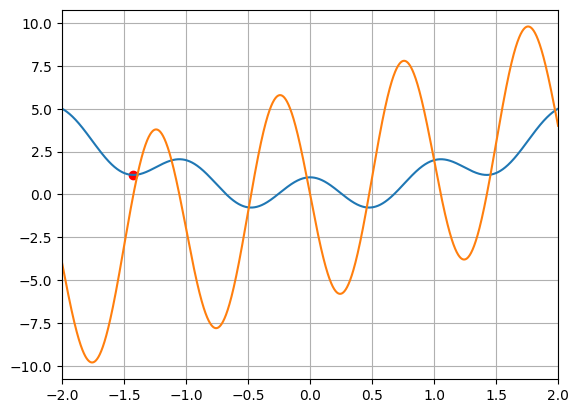

In [25]:
# Code from 1D GD
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 , 2 , 2001)
def fx(x): # Main fn
  return (np.cos(2*np.pi*x) + x**2)

def dfx(x): # Derivative fn
  return (-2*np.pi*np.sin(2*np.pi*x) + 2*x)

localmin = np.random.choice(x,1)
learning_rate = 0.01 # choosing a random learning rate initially
print(learning_rate)
training_epochs = 150

for i in range(training_epochs):
  deriv = dfx(localmin)


  lr = (1- (1+i/training_epochs))*learning_rate # learning rate changes with time
   # Industry Level usage -
  localmin = localmin + lr*deriv
print(localmin)

plt.plot(x,fx(x) , x,dfx(x))
plt.grid()
plt.xlim(-2,2)
plt.scatter(localmin,fx(localmin), color='r')

plt.show()

# **PERCEPTRON**

In [26]:
# Perceptron
# Single Layer Perceptron
import numpy as np

def unit_step_fn(x):
    return np.where(x>0, 1, 0)


class Perceptron:
    def __init__(self , learning_rate =0.01 , training_epochs=1000):
        self.lr = learning_rate
        self.te = training_epochs

        self.activation_fn = unit_step_fn # maps the model output into a final output value that here is 0 or 1
        self.weights = None # initially none
        self.bias = None # also initially none

    def fit(self ,X , y):
        n_samples, n_features = X.shape

        # Initial parameters
        self.weights = np.random.randn(n_features)
        self.bias = 0
        y_ = np.where(y>0, 1, 0)
        # Learn weights

        for _ in range(self.te):
            for index , x_i in enumerate(X):
                linear_output = np.dot(x_i,self.weights) + self.bias # Output of linear fn
                y_predicted = self.activation_fn(linear_output) # Non linear output mapping

                # Perceptron updatation rules
                update = self.lr + (y_[index]-y_predicted)
                # Modifying weights
                self.weights += update *x_i
                self.bias += update


    def predict(self ,x):
        linear_output = np.dot(x,self.weights) + self.bias
        y_predicted = self.activation_fn(linear_output)

        return y_predicted



if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true , y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X , y = datasets.make_blobs(
        n_samples=150 , n_features=2, centers=2 ,cluster_std=1.05 ,random_state=2
    )

    x_train , x_test , y_train , y_test = train_test_split(
        X ,y , test_size=0.2 , random_state=123
    )



    p = Perceptron(learning_rate = 0.01 , training_epochs = 1000)
    p.fit(x_train , y_train)
    predictions = p.predict(x_test)

    print("Accuracy of the perceptron classification: " , accuracy(y_test , predictions))

Accuracy of the perceptron classification:  1.0
